In [ ]:
# Load data & initial setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from datasets import load_dataset

In [ ]:
# Load dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

In [ ]:
eu_list = [
    "Albania", "Andorra", "Austria", "Belgium", "Belarus",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Montenegro",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France",
    "Greece", "Spain", "Netherlands", "Ireland", "Iceland", "Kosovo",
    "Liechtenstein", "Lithuania", "Luxembourg", "Latvia",
    "North Macedonia", "Malta", "Moldova", "Monaco", "Germany",
    "Norway", "Poland", "Portugal", "Romania", "Russia",
    "San Marino", "Serbia", "Slovakia", "Slovenia", "Switzerland",
    "Sweden", "Turkey", "Ukraine", "Vatican City", "Hungary",
    "United Kingdom", "Italy"
]

# Filter by EU country and Data Analyst position
df_eu = df.copy()

# Convert job posted date column to datetime
df_eu['job_posted_date'] = pd.to_datetime(df_eu['job_posted_date'])

# Convert skills column from string to list
df_eu['job_skills'] = df_eu['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter by EU country and Data Analyst position
df_eu = df_eu[(df_eu['job_location'].isin(eu_list))&(df_eu['job_title_short'] == 'Data Analyst')]
df_eu

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None
206,Data Analyst,Business Intelligence / Data Analyst,United Kingdom,via SonicJobs,Full-time,False,United Kingdom,2023-02-16 13:17:48,False,False,United Kingdom,None,NaN,NaN,Michael Page Technology,[tableau],{'analyst_tools': ['tableau']}
218,Data Analyst,Data and Strategy Analyst | Customer Success,United Kingdom,via SimplyHired,Full-time,False,United Kingdom,2023-09-01 13:35:06,True,False,United Kingdom,None,NaN,NaN,DeepL SE,[sql],{'programming': ['sql']}
223,Data Analyst,Data Analyst,Luxembourg,via BeBee Luxembourg,Full-time,False,Luxembourg,2023-05-29 13:37:00,False,False,Luxembourg,None,NaN,NaN,Dennemeyer,"[sql, python, r, sql server, azure, power bi, ...","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
252,Data Analyst,Analyste de données (Power BI),France,via LinkedIn,Full-time,False,France,2023-11-14 13:37:40,False,False,France,None,NaN,NaN,PRO ADVICE,"[sql, power bi, dax]","{'analyst_tools': ['power bi', 'dax'], 'progra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785168,Data Analyst,Data Analyst COO Business Management,Germany,via BeBee,Full-time,False,Germany,2023-11-09 06:38:25,False,False,Germany,None,NaN,NaN,EON Energie Deutschland,"[sql, power bi]","{'analyst_tools': ['power bi'], 'programming':..."
785216,Data Analyst,Game Data Analyst,Netherlands,via BeBee Nederland,Full-time,False,Netherlands,2023-01-28 07:07:21,True,False,Netherlands,None,NaN,NaN,MysteryTag,"[sql, python, postgresql, bigquery, numpy, pan...","{'analyst_tools': ['tableau'], 'cloud': ['bigq..."
785279,Data Analyst,Data - Product Analyst,Spain,via BeBee,Full-time,False,Spain,2023-01-03 06:37:18,False,False,Spain,None,NaN,NaN,InGame Recruitment,"[sql, bigquery, looker]","{'analyst_tools': ['looker'], 'cloud': ['bigqu..."
785491,Data Analyst,Data Analyst,Netherlands,via BeBee Nederland,Full-time,False,Netherlands,2023-01-28 07:07:21,True,False,Netherlands,None,NaN,NaN,Personato,None,None


In [ ]:
# Drop rows with no salary year avg provided
df_eu = df_eu.dropna(subset='salary_year_avg')

# Explode skill column to seperate rows
df_eu_exploded = df_eu.explode('job_skills')

# Aggregate skills in EU: median salary + count
df_eu_skills = df_eu_exploded.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='count',ascending=False)
df_eu_skills= df_eu_skills.rename(columns={'median':'median_salary','count':'skill_count'})

# Calculate percent share of jobs requiring each skill
da_job_count = len(df_eu)
df_eu_skills['skill_percent'] = (df_eu_skills['skill_count'] / da_job_count) * 100

# Select top 10 most in-demand skills
df_eu_top_skills = df_eu_skills.head(10)
df_eu_top_skills


,median_salary,skill_count,skill_percent
job_skills,,,
sql,89204.00,31,41.891892
python,102500.00,26,35.135135
excel,75067.50,21,28.378378
tableau,105000.00,17,22.972973
power bi,89204.00,11,14.864865
gcp,75067.50,9,12.162162
azure,91925.00,8,10.810811
sap,66858.75,8,10.810811
looker,111175.00,7,9.459459


In [ ]:
# Extract and normalize technology–skill relationships
df_tech = df['job_type_skills'].copy()
df_tech = df_tech.drop_duplicates()
df_tech = df_tech.dropna()

tech_dict = {}

for row in df_tech:
    row_dict = ast.literal_eval(row)

    for key,value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else:
            tech_dict[key] = value
            
# Ensure unique skills within each technology category
for key,value in tech_dict.items():
    tech_dict[key] = list(set(value))



In [ ]:
# Create table mapping technology individual skills
df_technology = pd.DataFrame(data=tech_dict.items(),columns=['Technology','skills'])
df_technology = df_technology.explode('skills')
df_technology

,Technology,skills
0,analyst_tools,splunk
0,analyst_tools,ms access
0,analyst_tools,alteryx
0,analyst_tools,nuix
0,analyst_tools,sheets
...,...,...
9,sync,wire
9,sync,twilio
9,sync,microsoft teams
9,sync,zoom


In [ ]:
# Join top EU skills with their associated technologies
df_final = df_eu_top_skills.merge(df_technology,left_on='job_skills',right_on='skills')
df_final

,median_salary,skill_count,skill_percent,Technology,skills
0,89204.00,31,41.891892,programming,sql
1,102500.00,26,35.135135,programming,python
2,75067.50,21,28.378378,analyst_tools,excel
3,105000.00,17,22.972973,analyst_tools,tableau
4,89204.00,11,14.864865,analyst_tools,power bi
5,75067.50,9,12.162162,cloud,gcp
6,91925.00,8,10.810811,cloud,azure
7,66858.75,8,10.810811,analyst_tools,sap
8,111175.00,7,9.459459,analyst_tools,looker
9,87802.00,6,8.108108,programming,r


C:\Users\Gumiuk\AppData\Local\Temp\ipykernel_8716\3637523348.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_eu_top_skills['median_salary'][i],


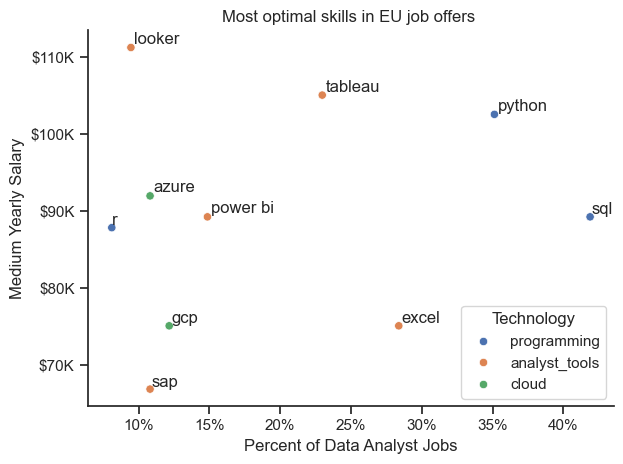

In [ ]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Scatterplot relating skill popularity vs. salary, colored by technology category
sns.scatterplot(
    data=df_final,
    x='skill_percent',
    y='median_salary',
    hue='Technology'
)

# Add skill labels to points
texts = []

for i,val in enumerate(df_eu_top_skills.index):
    texts.append(
        plt.text(
            df_eu_top_skills['skill_percent'].iloc[i],
            df_eu_top_skills['median_salary'][i],
            val)
            )

# Automatically adjust label positions and draw arrows
adjust_text(texts, arrowproprops=dict(arrowstyl='->',color='gray',lw=3))

ax = plt.gca() 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:  f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


# Apply theme, labels, layout
sns.despine()
sns.set_theme(style='ticks')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Medium Yearly Salary')
plt.title('Most optimal skills in EU job offers ')
plt.tight_layout()
plt.show()